In [32]:
import numpy as np
import astropy
import math
#import yt
#from yt.units import Msun, pc, kpc, Mpc, km, s, Gyr, Kelvin, g, cm, Myr
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import UnivariateSpline
from powerbox import PowerBox
from powerbox import get_power

In [33]:
hv_alpha = 3.028113999E-12 #[erg] energy of H-alpha line 
H0 = 0.677699966430664E+02
G = 6.67408E-8
c = 2.99792458e10
omega_b=0.450000017881393E-01
omega_m=0.307
omega_l=0.693
hv_alpha = 3.028113999E-12 #[erg] - in cgs unit
m_p = 1.6726E-24 #[g] - in cgs unit
k_b = 1.3807E-16
e = 2.71828182845904
unit_d = np.load('unit_d.npy').astype(np.float32)
redshift = np.load('redshift.npy').astype(np.float32)
scale = np.load('scale_factor.npy').astype(np.float32)

In [34]:
def rec(T):
    return 1.17e-13*(T/10**4)**(-0.942-0.031*np.log(T/10**4)) * hv_alpha # = h_nu x alpha eff : Draine-based
def col(T):
    return 3.57e-17*(np.exp(-140360/T)/T**0.5)*(1+7.8/(1+5E5/T)) # = epsilopn_col (H-alpha) : Raga-based
def raga_rec(T):
    return 4.85e-23 / (T**0.568 +3.85 * 10**(-5) * T**1.5) # = epsilon_rec (H-alpha) : Raga-based

In [35]:
temp = np.arange(0, 1000000, 1000)

In [36]:
temprec = rec(temp)
tempcol = col(temp)
ragarec = raga_rec(temp)

/var/folders/zx/jtqqh75d5_dbs29d4m3j6g_r0000gn/T/ipykernel_13664/4019451654.py:2: RuntimeWarning: divide by zero encountered in log
  return 1.17e-13*(T/10**4)**(-0.942-0.031*np.log(T/10**4)) * hv_alpha # = h_nu x alpha eff : Draine-based
/var/folders/zx/jtqqh75d5_dbs29d4m3j6g_r0000gn/T/ipykernel_13664/4019451654.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return 3.57e-17*(np.exp(-140360/T)/T**0.5)*(1+7.8/(1+5E5/T)) # = epsilopn_col (H-alpha) : Raga-based
/var/folders/zx/jtqqh75d5_dbs29d4m3j6g_r0000gn/T/ipykernel_13664/4019451654.py:4: RuntimeWarning: invalid value encountered in true_divide
  return 3.57e-17*(np.exp(-140360/T)/T**0.5)*(1+7.8/(1+5E5/T)) # = epsilopn_col (H-alpha) : Raga-based
/var/folders/zx/jtqqh75d5_dbs29d4m3j6g_r0000gn/T/ipykernel_13664/4019451654.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return 4.85e-23 / (T**0.568 +3.85 * 10**(-5) * T**1.5) # = epsilon_rec (H-alpha) : Raga-based


Plot below is an attempt to replicate Figure 1 in Raga et al.

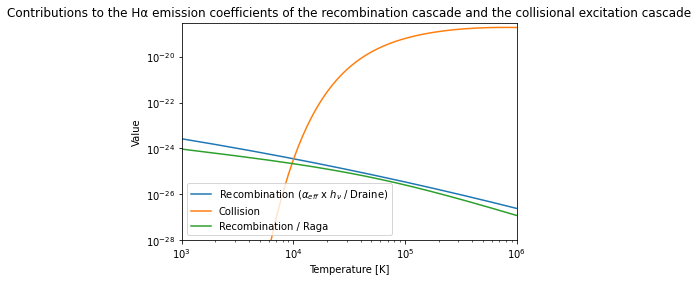

In [37]:
plt.title("Contributions to the Hα emission coefficients of the recombination cascade and the collisional excitation cascade") 
plt.xlabel("Temperature [K]") 
plt.ylabel("Value") 
plt.plot(temp, temprec, label = 'Recombination ($α_{eff}$ x $h_{ν}$ / Draine)')
plt.plot(temp, tempcol, label = 'Collision')
plt.plot(temp, ragarec, label = 'Recombination / Raga')
plt.yscale('log')  # Set x-axis to logarithmic scale
plt.xscale('log')
plt.xlim(10**3, 10**6)
plt.ylim(10**-28, 10**-18.5)
#plt.savefig('raga.png')
plt.legend()

Below: Comparinson between luminosity density of recombination and collision, in various conditions (input: Temperature, gas density (rho), ionization fraction (xion), and redshift_num (e.g. 117 for output_118). 

Both equations were based on the Draine's coefficient, and the result is the final version of cell-wise H-alpha luminoisty density (rec/col) we used for the research. 

In [41]:
def Rec(T, rho, xion, redshift_num):
    return hv_alpha * 1.17E-13*(T/10E3)**(-0.942-0.031*np.log(T/10E3))*((rho*unit_d[redshift_num]/m_p)*xion)**2 *0.76**2
def Col(T, rho, xion, redshift_num):
    return 3.57E-17 * ((unit_d[redshift_num])/m_p)**2 * 0.76**2 *  (1/T**0.5)*(1+7.8/(1+5E5/T)) * np.exp(-140360/T, dtype=np.float32) *rho**2 * xion * (1-xion)

In [42]:
Rec_example = Rec(40000,0.143,0.999, 117)
Col_example = Col(40000,0.143,0.999, 117)

In [43]:
Rec_example/Col_example

0.01071925868040383